Following is an overview of the survival rates of passengers based on gender and passenger class (1st, 2nd, and 3rd). I provide further analysis of the 50% survival rate seen in the sample of 3rd class female passengers, which is significantly lower than the survival rate of 1st and 2nd class female passengers (both >90%). For the provided sample data from Kaggle, third class females travelling alone or leaving from Queenberg were more likely to survive. Younger passengers within this group also had increased odds of survival.

Overview of the Evacuation of the Titanic: 

To gain an understanding of the events that took place during the sinking, as well as the policies used by the crew to evacuate passengers, I read 'A Night to Remember' by Walter Lord. From reading the book, I came to understand that there was not a practiced procedure in place on the Titanic for evacuating passengers, leading to different policies and strategies being implemented throughout the night at different areas of the boat.

Several variables seemed to play an important role in the evacuation of the titanic: gender, age, and class. Throughout the night, the central policy was that women and children had priority to board the lifeboats. In certain areas of the ship, men were allowed to board the lifeboats if there was extra room.

Class was another important distinction, and although class priority procedure was not always explicitly implimented, several factors prevented the third class passengers from boarding the lifeboats. The third class passengers were housed at the bottom of the boat, and the path to the deck was long and complicated. The first and second passengers had stewards assigned to small groups of people, but third class passengers were less informed of the situation, and had less guidance for finding the way to the deck.

    "Generally, third class was left to shift for itself. A few of the more enterprising met the challenge, but most milled helplessly about their quarters- ignored, neglected, forgotton" (Lord, 179).
    
The dataset used contains 891 entries of passenger information, out of the total 2224 passengers aboard the Titanic. The analysis cannot be used to determine survival probability of everyone aboard the Titanic, but is used to gain an understanding of trends in survival probability.

DATASET VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)


A summary number of passengers of each gender and class was completed for the entries in the dataset, as well as the ratio of people saved from each of these categories.

The data for these variables was found in the 'Sex' and 'PClass' columns. All 891 entries are included for each of these variables, and the class is stored as an integer (1, 2, or 3).

In [226]:
#Loading data into DataFrame

import pandas as pd

#graphing setup
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv(r'C:\Users\schro\Desktop\Projects\Data Analysis Nanodegree\P2 - Titanic\titanic-data.csv')

print data.info()
print data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence

By comparing the sample survival rates of males and females aboard the Titanic below, it's clear that females in this sample (74.2%) had a higher survival rate than males (18.9%). This may be due to the 'women and children first' policy implimented when boarding the lifeboats.

Keeping sex separated, looking at survival between classes will aid in understanding class priority.

In [153]:
females=data[data['Sex'] == 'female']
print 'Females on board=' +str(len(females))
males=data[data['Sex'] == 'male']
print 'Males on board=' +str(len(males))

#make sure no values other than 'male' and 'female' are stored in 'Sex'
print 'Total Male/Female = '+str(len(males)+len(females))
print('\n')
#number of females/males survived, then converted to ratio
print 'Ratio of Females Survived (1) and Lost (0):'
females_s= females['Survived'].value_counts()
print females_s/sum(females_s)
print('\n')
print 'Ratio of Males Survived (1) and Lost (0):'
males_s=males['Survived'].value_counts()
print males_s/sum(males_s)
print('\n')

    

Females on board=314
Males on board=577
Total Male/Female = 891


Ratio of Females Survived (1) and Lost (0):
1    0.742038
0    0.257962
Name: Survived, dtype: float64


Ratio of Males Survived (1) and Lost (0):
0    0.811092
1    0.188908
Name: Survived, dtype: float64




Within this sample, most of the 1st and 2nd class females survived (>90%). Of 3rd class women, there was a 50% survival rate. Fewer males survived, with 36.9% of 1st class males surviving, and a survival rate of 15.7% and 13.5% for 2nd and 3rd classes, respectively. 

Percent survival and chart displayed below.

In [301]:
def class_gender_ratio(gender,pclass):
    df=data[data['Sex'] == gender]
    df_class=df[df['Pclass']==pclass]
    #category count
    print 'Total number of '+gender+' class '+str(pclass)+' passengers:'
    print len(df_class)
    #percent calculation 
    print 'Percent of '+gender+' class '+str(pclass)+' passengers survived:'
    percent_survived= len(df_class[df_class['Survived']==1])/float(len(df_class))*100
    print round(percent_survived,1)
    return round(percent_survived,1)
    #return percent_survived
#investigate class/gender survival rates
#save to list to build bar chart

menSurv=[class_gender_ratio('male',1),class_gender_ratio('male',2),class_gender_ratio('male',3)]
print '\n'
womenSurv=[class_gender_ratio('female',1),class_gender_ratio('female',2),class_gender_ratio('female',3)]

Total number of male class 1 passengers:
122
Percent of male class 1 passengers survived:
36.9
Total number of male class 2 passengers:
108
Percent of male class 2 passengers survived:
15.7
Total number of male class 3 passengers:
347
Percent of male class 3 passengers survived:
13.5


Total number of female class 1 passengers:
94
Percent of female class 1 passengers survived:
96.8
Total number of female class 2 passengers:
76
Percent of female class 2 passengers survived:
92.1
Total number of female class 3 passengers:
144
Percent of female class 3 passengers survived:
50.0


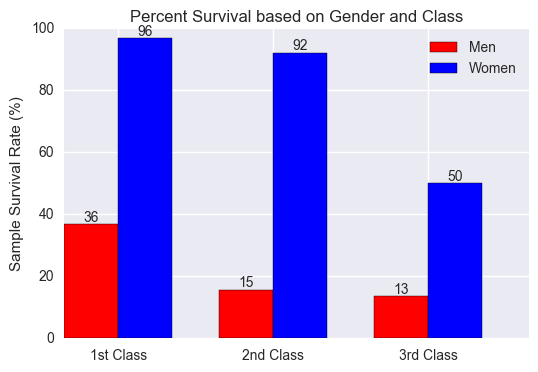

In [302]:
# add a bar plot for survival rate
import numpy as np
N = 3

ind = np.arange(N)  # middle x location
width = 0.35       # bar width

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menSurv, width, color='r')

rects2 = ax.bar(ind + width, womenSurv, width, color='b')

# add text for labels, title and axes ticks
ax.set_ylabel('Sample Survival Rate (%)')
ax.set_title('Percent Survival based on Gender and Class')
ax.set_xticks(ind + width)
ax.set_xticklabels(('1st Class', '2nd Class', '3rd Class'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

#add labels with values above bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


Following is further investigation of the survival rate of 3rd class female passengers. The sample survival rate was 50% for this group, and I was interested in what may have increased the odds of survival, with signal being easier to detect in a group where survival was less easily predicted by class or gender.

Third class female passengers may not have been explicitly prevented from entering the lifeboats, but the long distance between 3rd class cabins and the lifeboats, as well as a lack of direction for 3rd class passengers led to many of them being lost, or unaware of the situation, below deck.

This further analysis is used to determine the proportion of survival as it relates to travel status (alone or with spouse/family), age, and the city from which the individual embarked.

Travel status was first investigated. Results from the sample set show that:

144 third class female passengers were included in the sample set.

For third class women travelling alone, percent survival was: 61.7%
For third class women travelling with a partner, percent survival was: 41.7%

A 2-sample Z-test (two-tailed) for independent samples was used to calculate whether there was a significant difference between these two proportions of women.

Z*=(p1-p2)/[(p(1-p)(1/n1+1/n2)]
=(.617-.417)/[(0.5(1-0.5)(1/84+1/60)]
=28


At a confidence interval of alpha equal to 0.001, z=+- 3.27 and our two samples are shown to be signficantly different. Third class women travelling alone within this sample set were more likely to survive.

The higher survival rate for women travelling alone may be related to pressures to stay behind with husbands or male family members. Lord's text includes accounts of women refusing to leave their husbands. Isidor Straus was said to have told her husband "we have been living together for many years. Where you go, I go" as they sat down together to wait until the end (Lord).


In [577]:
#create dataframe female_3 with only data from females in third class
df=data[data['Sex'] == 'female']
female_3=df[df['Pclass']==3]

#dataframe of those travelling with someone and without
travel_partner=[]
travel_alone=[]
#build travel lists
for index, row in female_3.iterrows():
        
    if row['Parch']>=1 or row['SibSp']>=1:
        travel_partner.append(row)
    else:
        travel_alone.append(row)
    
print str(len(travel_partner))+ ' with partner'
print str(len(travel_alone))+' alone'
#function that takes list and calculates the percent survival within list

def survival_percent_list(list_individuals):
    survival=0
    for entry in list_individuals:
        if entry[1]==1:
            survival=survival+1
    length=len(list_individuals)
    percent= float(survival)/float(length)*100
    percent=round(percent,1)
    return percent

aloneodds= survival_percent_list(travel_alone)
partnerodds= survival_percent_list(travel_partner)

print 'For third class women travelling alone, percent survival was: '+ str(aloneodds) +'%'
print 'For third class women travelling with a partner, percent survival was: '+ str(partnerodds) +'%'
    

84 with partner
60 alone
For third class women travelling alone, percent survival was: 61.7%
For third class women travelling with a partner, percent survival was: 41.7%


The city from which an individual embarked may have been significant, especially for third class passengers. Instructions for loading the boats was given in english, and it may have been beneficial to be able to clearly communicate.

Third class female passengers were divided by city, to understand the proportion from each city that survived.

Total number of third class female passengers from city key:C
23
Percent of survived:
65.2
Total number of third class female passengers from city key:Q
33
Percent of survived:
72.7
Total number of third class female passengers from city key:S
88
Percent of survived:
37.5

A larger proportion of passengers from Queenstown survived, a group made up mainly of Irish immigrants who would have spoken english.
Only 37.5% of the sample group from Southampton survived. This may be related to the fact that many of these passengers were crew members.

Total number of third class female passengers from city key:C
23
Percent of survived:
65.2
Total number of third class female passengers from city key:Q
33
Percent of survived:
72.7
Total number of third class female passengers from city key:S
88
Percent of survived:
37.5


[<matplotlib.text.Text at 0x1a0a76d8>, <matplotlib.text.Text at 0x1ac5e198>]

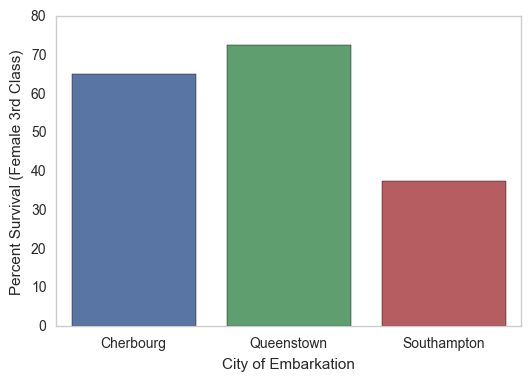

In [559]:
city_percents=[] #percentages to graph

def city_percent_survival(data,city):
    df=data[data['Embarked'] == city]
       
    #category count
    print 'Total number of third class female passengers from city key:'+str(city)
    print len(df)
    #percent calculation 
    print 'Percent of survived:'
    percent_survived= len(df[df['Survived']==1])/float(len(df))*100
    print round(percent_survived,1)
    city_percents.append(percent_survived)
city_percent_survival(female_3,'C')
city_percent_survival(female_3,'Q')
city_percent_survival(female_3,'S')

cities=['Cherbourg','Queenstown','Southampton'] #cities to display

city_graph=sns.barplot(x=cities,y=city_percents) #create barplot
city_graph.set(xlabel='City of Embarkation', ylabel='Percent Survival (Female 3rd Class)')


Finally, the proportion of survival of different age groups of third class female passengers was investigated to understand whether age had a significant effect on survival of the group. A histogram is displayed below showing the range of ages within this group. A kernal density plot showing the relative age distribution of all passengers is overlayed on the histogram. 

There were relatively more passengers under the age of 5 in the group of female 3rd class passengers, compared to the whole dataset. Passengers in the first and second class were more likely to be visitors or tourists, whereas third class passengers were more likely to be immigrants (Lord). For families starting a new life abroad, they would be more likely to travel with babies and children, which may be why the distribution of young children is greater for the subset. 

Taking into consideration that the oldest passenger aboard the Titanic was 71 years old, there is a good distribution of ages within this subset, with a spectrum of ages represented, and the majority between the ages of 15 and 30.

Out of the 144 entries for this group, 102 have valid age data (70.8%). An explanation is not given for missing age data from the entries. The entries with missing age data will not be estimated when analyzing survival of the different age groups since age is being compared only to survival, separately from any other independant variables. These entries with missing age data were be included in all other analysis.

       PassengerId    Survived  Pclass         Age       SibSp       Parch  \
count   144.000000  144.000000   144.0  102.000000  144.000000  144.000000   
mean    399.729167    0.500000     3.0   21.750000    0.895833    0.798611   
std     267.232416    0.501745     0.0   12.729964    1.531573    1.237976   
min       3.000000    0.000000     3.0    0.750000    0.000000    0.000000   
25%     165.250000    0.000000     3.0         NaN    0.000000    0.000000   
50%     376.000000    0.500000     3.0         NaN    0.000000    0.000000   
75%     636.000000    1.000000     3.0         NaN    1.000000    1.000000   
max     889.000000    1.000000     3.0   63.000000    8.000000    6.000000   

             Fare  
count  144.000000  
mean    16.118810  
std     11.690314  
min      6.750000  
25%      7.854200  
50%     12.475000  
75%     20.221875  
max     69.550000  


[(0, 70.0)]

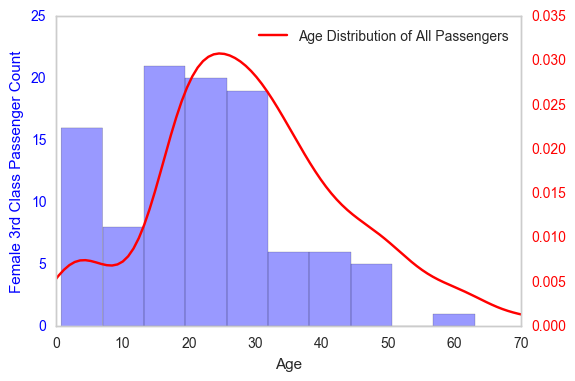

In [509]:
#sort dataframe based on age data, NaN values will go to the end
f3_age=female_3.sort_values(['Age'])

print f3_age.describe()
#age count is 102. Since values are ordered, indices 0-101 contain valid age data

sns.set_style("whitegrid", {'axes.grid' : False}) #turn off grid for different axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() #create separate axis for total passenger distribution

#make histogram data/labels blue
ax1.set_ylabel('Female 3rd Class Passenger Count',color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')

# make kernel distribution data/labels red
for tl in ax2.get_yticklabels():
    tl.set_color('red')

    #plot valid age data, do not display negative age ranges
sns.distplot(f3_age['Age'][0:102],label='Women, 3rd Class',kde=False,ax=ax1,color='blue').set(xlim=(0))

age_data=data['Age'].dropna() 
sns.distplot(age_data,hist=False, label='Age Distribution of All Passengers',ax=ax2,color='red').set(xlim=(0))


A boxplot was constructed to understand whether third class female survivors tended to be older or younger. Survivors were, on average, younger. It also appears that few people within the 40-50 year old age range survived. As also shown in the histogram above, there is one outlier, a 63 year old women, who was the only member of this group above the age of 50.

[<matplotlib.text.Text at 0x1bad8cc0>, <matplotlib.text.Text at 0x1dba0780>]

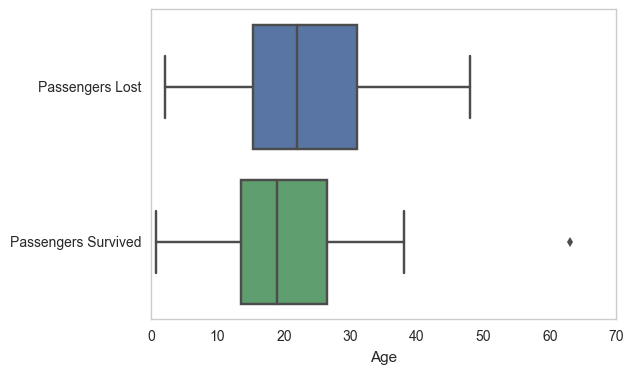

In [576]:
#create axis
fig, axbox = plt.subplots()
#create boxplot
sns.boxplot(x='Age', y='Survived', orient='h', data=f3_age,ax=axbox)
axbox.set_ylabel('')
axbox.set_yticklabels(['Passengers Lost','Passengers Survived'])

The limited data set for 3rd class female passengers may not be large enough to give us a good understanding of survival at each individual age. A function was written that divides the ages into different bins, and calculates the proportion of survival within each bin.

Each bin size is approximately equal, with the sample size being divided by the number of bins, and any remainder being added to the last bin.

Age ranges in each bin are returned from the function and included in the charts below.


In [403]:

age1=f3_age.iloc[0:25] #ages 0 to 14 included
age2=f3_age.iloc[25:50] #ages 14 to 21 included
age3= f3_age.iloc[50:76] #ages 21 to 29 included
age4=f3_age.iloc[76:102] #ages 30 to 63 included
age_nan=f3_age.iloc[102:]


#remove NaN values
f3_age_clean=f3_age[0:102]
#Calculate survival percent in each category and append to list to build chart.
def survival_by_age(dataframe,number_of_bins):
    groupsize=len(dataframe)/number_of_bins
    list_percents=[]
    starting_age=[]
    bins=1
    start_index=0
    while bins<=number_of_bins:
        end_index=start_index+groupsize
        ageset=dataframe.iloc[start_index:end_index] #separate bin by size
        if bins==number_of_bins:
            ageset=dataframe.iloc[start_index:] 
        percent_survived= len(ageset[ageset['Survived']==1])/float(len(ageset))*100 #calculate %survival in bin
        percent_survived=round(percent_survived,1)
        
        starting_age.append([ageset.iloc[0]['Age'],ageset.iloc[-1]['Age']]) #make a list of 1st age in each bin
        
        list_percents.append(percent_survived) #make a list of percent survival in each bin
        
        bins=bins+1
        start_index=end_index
    #output text 
    print 'Data separated into '+str(number_of_bins)+' bins of approximately '+str(len(ageset))+' members.'
    print 'Starting age of each bin:' +str(starting_age)
    print 'Percent survival for members in each age bin:'+ str(list_percents)
    return list_percents, starting_age, number_of_bins
#survival_by_age(age_nan,1)

four_bins=survival_by_age(f3_age_clean,4)
five_bins=survival_by_age(f3_age_clean,5)
six_bins=survival_by_age(f3_age_clean,6)



Data separated into 4 bins of approximately 27 members.
Starting age of each bin:[[0.75, 14.0], [14.0, 21.0], [21.0, 29.0], [29.0, 63.0]]
Percent survival for members in each age bin:[52.0, 48.0, 52.0, 33.3]
Data separated into 5 bins of approximately 22 members.
Starting age of each bin:[[0.75, 9.0], [9.0, 18.0], [18.0, 24.0], [24.0, 30.5], [31.0, 63.0]]
Percent survival for members in each age bin:[55.0, 50.0, 45.0, 50.0, 31.8]
Data separated into 6 bins of approximately 17 members.
Starting age of each bin:[[0.75, 8.0], [9.0, 17.0], [17.0, 21.0], [22.0, 26.0], [27.0, 32.0], [33.0, 63.0]]
Percent survival for members in each age bin:[64.7, 47.1, 35.3, 58.8, 41.2, 29.4]


Survival rate was calculated for the sample after being divided into 4 bins, 5 bins, and 6 bins. These three charts are displayed below, with specific age ranges displayed on the x-axis. 

There is little variation between data when divided into four separate bins, but more distinction can be made after it is divided into 5 or 6 bins. In both of these sets, the lowest age group has the highest survival rate, with the highest age group has the lowest survival rate. Female children may have had some priority over female adults, leading their higher survival rate.

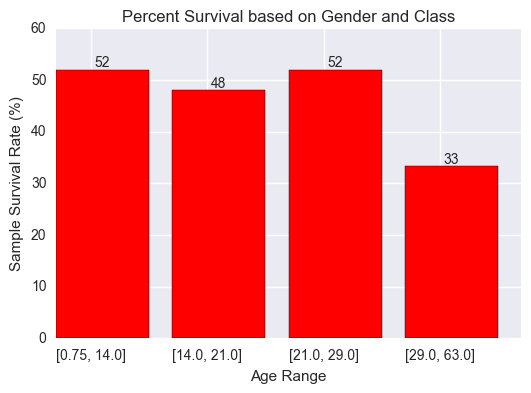

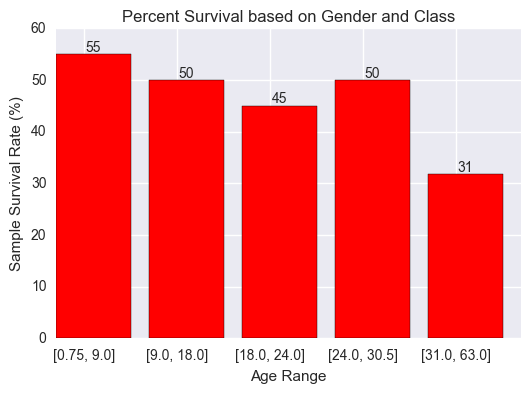

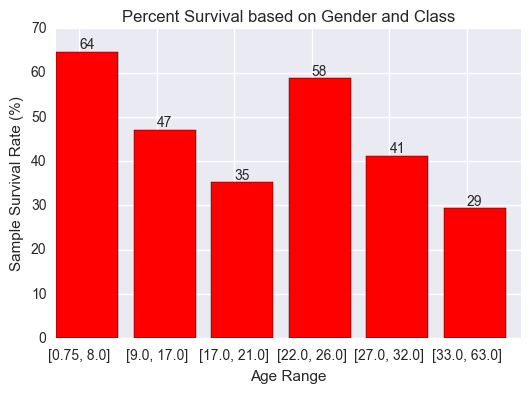

In [391]:
def graph_age(binned_age_survival):
    N = binned_age_survival[2] #number of bins set for number of bars

    ind = np.arange(N)  # middle x location
    width = .6    # bar width

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, binned_age_survival[0],  color='r',align='edge')


    # add text for labels, title and axes ticks
    ax.set_ylabel('Sample Survival Rate (%)')
    ax.set_xlabel('Age Range')
    ax.set_title('Percent Survival based on Gender and Class')
    ax.set_xticks(ind+width/2 )
    ax.set_xticklabels(binned_age_survival[1])


    #add labels with values above bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                    '%d' % int(height),
                    ha='center', va='bottom')

    autolabel(rects1)

graph_age(four_bins)
graph_age(five_bins)
graph_age(six_bins)


Many insights regarding likliness of survival can be gathered from this dataset, especially with regard to class and gender. Odds for survival for 1st and 2nd class females were greater than 90%. On the other hand, 36.9% of 1st class males survived, and only 15.7% and 13.5% males survived for 2nd and 3rd classes, respectively. 

This is likely due to the fact that women and children had evacuation priority, and third class passengers were stationed below deck; further from the lifeboats with little guidance during the disaster.

I investigated the subset of 3rd class females further, curious as to whether other factors affected the 50% survival rate seen within this group. Members in this group embarking from Ireland showed a slightly higher survival rate (72.7%), possibly due to english language fluency that would be helpful during evacuation. On the other hand, passengers from Cherbourg showed almost an equally high survival rate of 65.2%. Those travelling alone also showed a higher survival rate. Men were not allowed to board the boats, and it's possible that women stayed behind with male family members during evacuation.

When this subset was divided into six different age bins, highest survival rates were seen for the youngest set (0 to 8 years) and young adults (22 to 26 years). The youngest category may have had priority over older passengers, and it's possible that babies and new mothers corresponding to these two age bins would have been given evacuation priority. 

The supplied dataset contains 891 entries of passenger information, out of the total 2224 passengers aboard the Titanic, and approximately 20% of age data was missing from these available entries. It's unclear what prevented the full dataset collection, and only data supplied was analyzed. Passenger data may not have been properly collected or recorded. Although some minor trends may be observed throughout this analysis, gender and class seem to have the greatest effect on the data, but over 10% of every gender-class category survived. Due to the unstructured evacuation procedure, survival seemed partially up to chance, with the fortunate making it to the right spot at the right time.

Materials used: 
Book: 'A Night to Remember' by Walter Lord.
Titanic dataset from Kaggle: https://www.kaggle.com/c/titanic/data